# Seeing Change Over Time: An Introduction to Time Series Analysis

<div class="alert alert-info">

Welcome back! This activity is part of an introduction to computational notebooks, designed specifically for K-12 educators.
                                                                                                         
Here, we'll dive into a specific, powerful type of analysis: **exploring data that changes over time**. This is called **time series analysis**.

</div>

Data that unfolds over time is everywhere: daily temperature, stock market prices, student attendance, historical events, and ecological changes.

<hr style="border: 5px solid #003262;" />

## Key Ideas in Time Series Analysis
<br/>

To explore some of the key ideas related to the code, math, and science of time series analysis, in this notebook we will be exploring **air quality data**.


**Our Learning Goals:**

* ⏰ **Handling Dates and Times:** Learn to create and use `datetime` objects for organizing data and handling tricky cases like leap years.  

* 📈 **Visualizing Trends:** Use `lineplot` to reveal patterns and create clear, accurate line plots. Use visualizations and context to interpret trends over time, and determine what might be real signals vs random noise.  

* 🌍 **Content:** Explore how air quality is measured, uncover patterns linked to real-world events and behaviors, and consider how data about air quality can be used to make decisions.  


<hr style="border: 1px solid #fdb515;" />

We'll start with a quick intro to the foundations of time series data by looking at hourly air quality measurements.  

Our focus is the **Air Quality Index (AQI)**, a measure widely used by health and government agencies to communicate air safety. AQI combines several pollutants into a single score that reflects whether the air is safe to breathe.  

The data we'll explore comes from an air quality monitoring station in **West Oakland, California**.  


---

### Part I: Loading the Data

We're going to load a dataset of hourly AQI readings from one week at a West Oakland monitoring station.  

The data comes from the Bay Area Air Quality Management District, which monitors and reports on air quality across the Bay Area.  


In [1]:
import pandas as pd # pandas is for making data tables

aqi_data = pd.read_csv('baaqmd_data.csv') # read the data

aqi_data # show the first 10 rows of data

,Month,Day,Year,Time,AQI
0,7,2,2025,00:00,20
1,7,2,2025,01:00,20
2,7,2,2025,02:00,18
3,7,2,2025,03:00,11
4,7,2,2025,04:00,14
...,...,...,...,...,...
163,7,8,2025,19:00,19
164,7,8,2025,20:00,19
165,7,8,2025,21:00,20
166,7,8,2025,22:00,20


<div class="alert alert-success">

**Considering the data above…**

* What do you notice and wonder about this dataset?  

* What questions could you explore further?  

</div>

We'll use this dataset to practice coding and creating visualizations for time series analysis.  
<br/>
Remember: good documentation explains the **why** (in text) and the 
**how** (in `# code comments`).  



---

### Part II: Working with `datetime`

You may have noticed that the month, day, year, and hour of each AQI record are stored in separate columns. If we tried to graph the data this way, we couldn’t place "time" correctly on the x-axis.  

To fix this, we’ll combine them into a single `datetime`, a special format computers use to organize time.  


Let’s look at a quick example with one date, then apply the same process to all AQI records.  

👉 Try replacing the code below with a date that’s special to you!  


In [4]:
# often, datasets express date and time separately. 
# we will practice with a single, split up date
year = 2024 # a number format
month = 10
day = 12
time = "16:00" # a string/text format

# let's split the time up into hours and minutes
# the line below makes the values before ':' go to hours
# and the values after ':' go to minutes
hours, minutes = time.split(':')

# first, we put these together into a common date format 
consolidated = str(month) + "-" + str(day) + "-" + str(year) + " " + str(hours) + ":" + str (minutes)
consolidated # show the text string we made

'10-12-2024 16:00'

Now, we want to take the combined date and convert it to the `datetime` object. 

Making something an "object" means the computer recognizes it as something (like a date) that can be treated in special ways (like adding hours or days to it), rather than just text.

In [5]:
# if a text string uses a common date format, the to_datetime
# function will automatically read and convert it to a
# datetime. 

pd.to_datetime(consolidated)

Timestamp('2024-10-12 16:00:00')

After using `to_datetime`, the date is the same but it is represented slightly differently as a "Timestamp." The computer now recognizes it as a special object representing time. 

Below, we’ll repeat this process for the entire air quality dataset. 

Earlier, we tried it with just one date. This time, the code looks a bit different because it applies to *all* the records in `aqi_data`.  

In [6]:
# Each record has Month, Day, Year, and Time.

# First, make new columns "Hours" and "Minutes."
# Split the Time into Hours and Minutes and put each in its column.
aqi_data[['Hours', 'Minutes']] = aqi_data['Time'].str.split(':', expand=True).astype(int)

# Collect the parts of each date (year, month, day, hour, minute).
datetime_info = {
    'year': aqi_data['Year'],
    'month': aqi_data['Month'],
    'day': aqi_data['Day'],
    'hour': aqi_data['Hours'],
    'minute': aqi_data['Minutes']
}

# Convert to a single datetime and save it in a new column.
aqi_data['datetime'] = pd.to_datetime(datetime_info)

# Show the dataset with the new datetime column.
aqi_data

,Month,Day,Year,Time,AQI,Hours,Minutes,datetime
0,7,2,2025,00:00,20,0,0,2025-07-02 00:00:00
1,7,2,2025,01:00,20,1,0,2025-07-02 01:00:00
2,7,2,2025,02:00,18,2,0,2025-07-02 02:00:00
3,7,2,2025,03:00,11,3,0,2025-07-02 03:00:00
4,7,2,2025,04:00,14,4,0,2025-07-02 04:00:00
...,...,...,...,...,...,...,...,...
163,7,8,2025,19:00,19,19,0,2025-07-08 19:00:00
164,7,8,2025,20:00,19,20,0,2025-07-08 20:00:00
165,7,8,2025,21:00,20,21,0,2025-07-08 21:00:00
166,7,8,2025,22:00,20,22,0,2025-07-08 22:00:00


<div class="alert alert-success">

**Explore the new table above…**

* How might the new `datetime` column help with analysis?  

    
* What questions do you still have about what we’ve done here?  


</div>

---

### Part III: Visualizing the Data

Now that we have a proper `datetime` column, we can make a line plot.  
This shows the "shape" of the data over time.  

When reading a graph, pay attention to what increases or decreases actually mean. If you ignore the scale, something that looks dramatic may not be significant.  

Below is the U.S. Environmental Protection Agency’s guide to interpreting AQI values, helpful context for the plot we’ll create. 

<img src="epa_aqi_2.jpg" width="550"> 

Now let’s plot the AQI by time.


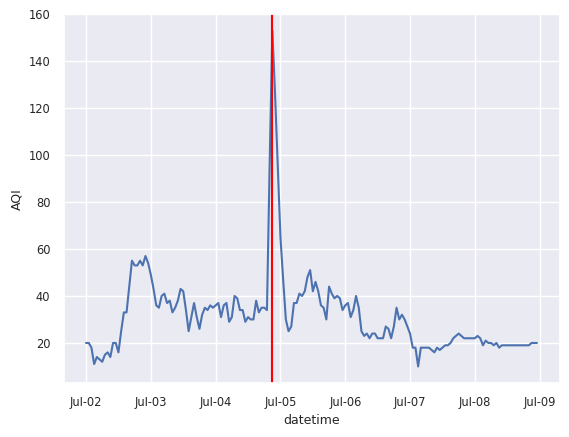

In [10]:
import seaborn as sns   # for nice-looking graphs
import matplotlib.pyplot as plt   # for axis labels
import matplotlib.dates as mdates   # for datetime formatting

# ----- Formatting -----
sns.set_theme(font_scale=.75)  # add grid lines and set font size

# Format dates on the x-axis: show month-day ("%b-%d").
# Other formats include day of the week (%a), year (%Y), etc.
date_format = mdates.DateFormatter('%b-%d')
plt.gca().xaxis.set_major_formatter(date_format)

# ----- Plotting -----
sns.lineplot(
    data=aqi_data, 
    x='datetime', 
    y='AQI'
)

<div class="alert alert-success">

**Explore the new table above…**


* What do you notice and wonder?


    
* What could have happened to create the pattern you see above?
    
    
* There are many rises and falls in the data. What patterns in this graph would you consider to be worth taking seriously? What might be \"noise\" due to natural fluctuations or measurement error? How are you making those decisions?


</div>

You may have noticed a large spike in the graph on **July 4**. You can draw extra lines on the graph to help you hone in on what's going on. 

Below are two sets of code. One can be used to draw a line at a specific x-coordinate in the graph, representing a certain `datetime`. The other can be used to draw a line at a specific y-coordinate, representing a certain value of AQI. 

Use the code below to get comfortable adding lines to the plot above.

```
# ------- Add a vertical line
plt.axvline(x=pd.to_datetime("2025-07-08 00:00:00"), # where to put the line
            color='red') # specify the color


# ------- Add a horizontal line
plt.axhline(y=20, # where to put the line
            color='red')
```

Now, use custom lines to explore an explanation of whats happening in the graph above based on what you know about July 4, West Oakland, and the Air Quality Index. 

Could you highlight information that could help people better understand or make decisions about air quality in the future, based on your findings?

**Summary:** You now know how to work with `datetime`, plot line graphs, add custom lines, and explore trends over time using a measure.  

Now let’s apply these skills to a more interactive data investigation.  


<hr style="border: 5px solid #003262;" />

# Getting Clear on Air Quality: An Investigation of Pollutants During San Francisco's Orange Skies Day.

On September 9, 2020, residents of the San Francisco Bay Area woke up to darkness and a sky glowing deep reddish orange.  
<br/>
This “Orange Skies Day” was caused by intense wildfires and weather conditions that trapped particulate matter high in the atmosphere, creating the dramatic effect.  


<div style="display: flex; justify-content: space-around;">
<br/>

<img src="bridge.jpg" width="250"> 
<br/>

<img src="financial.jpg" width="250"> 
<br/>

<img src="nature.jpg" width="250"> 
<br/>

</div>
<br/>

In this activity, we’ll examine hourly air quality measurements from Richmond, CA (near San Francisco) taken between Sept 6 and Sept 16, 2020.  

<hr style="border: 1px solid #fdb515;" />

## Part I: Loading the data

First, let’s preview the dataset we’ll work with. 

👉 Before you run the next cell, take a moment to predict which attributes (columns) you expect to see.  


In [11]:
fire_data = pd.read_csv('sept2020.csv')

fire_data # this will show the first 5 records and the last 5 records in the dataset.

,pollutant,date_local,time_local,date_gmt,time_gmt,value,units_of_measure,datetime_local
0,Carbon monoxide,2020-09-06,00:00,2020-09-06,08:00,0.9,Parts per million,2020-09-06 00:00:00
1,Carbon monoxide,2020-09-06,01:00,2020-09-06,09:00,0.8,Parts per million,2020-09-06 01:00:00
2,Carbon monoxide,2020-09-06,02:00,2020-09-06,10:00,NaN,Parts per million,2020-09-06 02:00:00
3,Carbon monoxide,2020-09-06,03:00,2020-09-06,11:00,NaN,Parts per million,2020-09-06 03:00:00
4,Carbon monoxide,2020-09-06,04:00,2020-09-06,12:00,0.6,Parts per million,2020-09-06 04:00:00
...,...,...,...,...,...,...,...,...
787,PM2.5,2020-09-16,19:00,2020-09-17,03:00,5.0,Micrograms/cubic meter (LC),2020-09-16 19:00:00
788,PM2.5,2020-09-16,20:00,2020-09-17,04:00,5.0,Micrograms/cubic meter (LC),2020-09-16 20:00:00
789,PM2.5,2020-09-16,21:00,2020-09-17,05:00,3.0,Micrograms/cubic meter (LC),2020-09-16 21:00:00
790,PM2.5,2020-09-16,22:00,2020-09-17,06:00,3.0,Micrograms/cubic meter (LC),2020-09-16 22:00:00


<div class="alert alert-success">

* Were you in the Bay Area during the Orange Skies event? What do you remember?



* What do you notice and wonder about the dataset above?  



* What questions could you explore with this dataset?  



* What extra information would help you interpret these readings?  


</div>

Let’s look at some summary statistics to get a better sense of the data. We’ll use the `describe()` function, which you’ve seen before.  

Since measurements for different pollutants are all stored in the same column, we can use `groupby` to treat them separately.  

In [12]:
# show summary statistics, but do it by the different pollutant groups.
fire_data.groupby('pollutant').describe()

value                                               \
                 count       mean        std    min     25%     50%   
pollutant                                                             
Carbon monoxide  248.0   1.098387   0.519028  0.300   0.600   0.900   
Ozone            248.0   0.024476   0.013859  0.002   0.015   0.023   
PM2.5            263.0  61.650190  51.645733  0.000  14.500  43.000   

                                     
                       75%      max  
pollutant                            
Carbon monoxide    1.60000    2.100  
Ozone              0.03025    0.081  
PM2.5            106.00000  196.000

<hr style="border: 1px solid #fdb515;" />

As you can see, different pollutants are measured on different scales. To know what’s meaningful, we need some context on how they are measured and what the U. S. Environmental Protection Agency considers safe.  

Here are key details about the pollutants in this dataset, along with current EPA standards:  

| Pollutant | Description | Health Impact | Sources | Recommended Levels (U.S. EPA) |
| :--- | :--- | :--- | :--- | :--- |
| **$PM_{2.5}$** | Small airborne particles like ash or black carbon. One $\mu g/m^3$ is like a speck of fine dust inside a large moving box. | Can irritate the lungs and even enter the bloodstream, leading to other health issues. | Created by combustion sources like vehicles, power plants, and wildfires. | **0-9 $\mu g/m^3$**: Good<br>**12.1-35.4 $\mu g/m^3$**: Moderate<br>**35.5-55.4 $\mu g/m^3$**: Unhealthy for Sensitive Groups<br>**>55.5 $\mu g/m^3$**: Unhealthy for All |
| **Ozone ($O_3$)** | A gas molecule that is natural in the upper atmosphere, but is a pollutant at ground level. | Causes respiratory problems, especially for children and individuals with asthma. | Created when pollutants (especially from motor vehicles) react with heat and sunlight. | **>0.071 ppm**: Marginal<br>**>0.081 ppm**: Moderate<br>**>0.093 ppm**: Serious |
| **Carbon Monoxide ($CO$)** | A very small gas molecule that inhibits the blood's ability to transport oxygen. | At high levels, causes acute poisoning, loss of consciousness, and death. At low levels, can cause headaches, nausea, muscle pain, and cognitive impairment. | Motor vehicles and heating/cooking appliances in homes and businesses. | Harmful at **>9 ppm** (over 8 hours) or **>35 ppm** (over 1 hour). |

### Part II: Visualizing the Data Over Time

We’ll visualize pollutant concentrations with line plots for the days before, during, and after the September 2020 “Orange Skies” event.

<div class="alert alert-success">

**Before we create the line plot, consider:**

* What do you expect the plot to look like?  


</div>

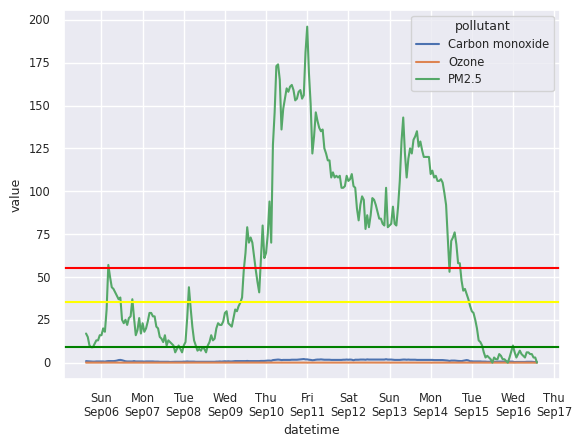

In [14]:
# Plot the three pollutants together.

# Ensure we have a proper datetime column
fire_data['datetime'] = pd.to_datetime(fire_data['datetime_local'])

# ----- Formatting -----
# Weekday on first line, month-day on second
date_format = mdates.DateFormatter('%a\n%b%d')
plt.gca().xaxis.set_major_formatter(date_format)

# Show a tick every 24 hours
locator = mdates.HourLocator(interval=24)
plt.gca().xaxis.set_major_locator(locator)

# ----- Plot -----
sns.lineplot(
    data=fire_data,
    x='datetime',
    y='value',
    hue='pollutant'
)

<div class="alert alert-success">

* Is this what you expected? Why or why not?  



* What do you notice or wonder here?  



* Which parts look like "signal" and which like "noise"?  



* What more would help you understand how air quality changed during the "Orange Skies" event?  



</div>

---

### Part III: Visualizing Trends for Each Pollutant

Since these pollutants are measured on very different scales, it’s helpful to view them separately.  

Below, we’ll filter the data to only **Carbon monoxide** and create a line plot.  


<Axes: xlabel='datetime', ylabel='value'>

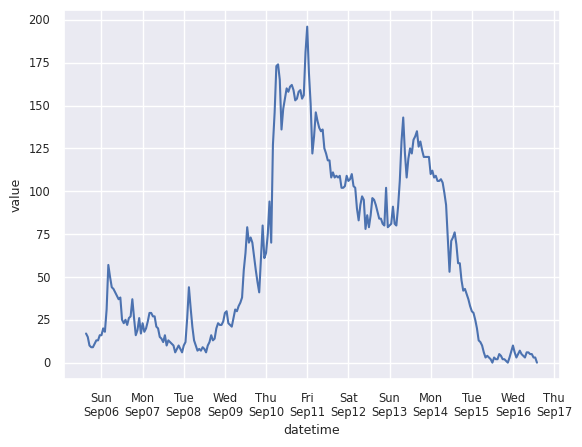

In [18]:
# ----- Formatting -----
# Show weekday on one line, month-day on the next
date_format = mdates.DateFormatter('%a\n%b%d')
plt.gca().xaxis.set_major_formatter(date_format)

# Show a tick every 24 hours
locator = mdates.HourLocator(interval=24)
plt.gca().xaxis.set_major_locator(locator)

# ----- Filter to pollutant -----
pollutant_data = fire_data[fire_data['pollutant'] == "Carbon monoxide"]

# ----- Plot -----
sns.lineplot(data=pollutant_data, 
             x='datetime', 
             y='value')


What trends do you expect for the other pollutants?  

👉 Edit the code above to explore `PM2.5`, `Ozone`, and `Carbon monoxide` separately so each pattern is visible on an interpretable scale.


<div class="alert alert-success">

* What new things did you notice when looking at the plots separately?  



* What helped you make sense of each pollutant’s plot? What more would be useful?  



* What questions do you still have?  




---

### Part IV: Looking Across Pollutants Simultaneously

You may have noticed that not all pollutants rose or fell at the same time during the wildfires.  

In time series analysis, it can be helpful to align multiple plots to compare values at the same point in time.  

Below, we generate a plot with all three pollutants shown together.  


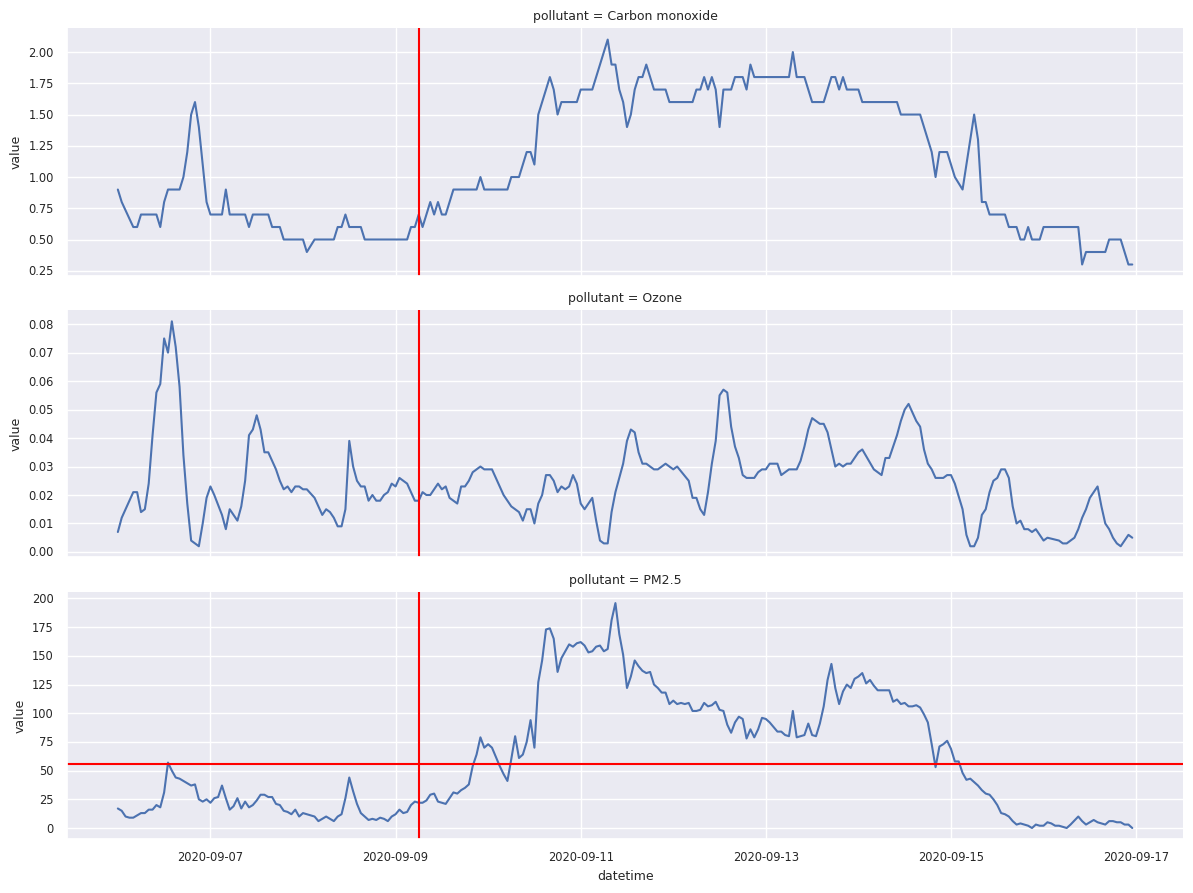

In [23]:
g = sns.FacetGrid(fire_data, 
                  row="pollutant", 
                  aspect=4, # this makes graphs 4x wider than tall
                  sharey=False) # treat the scale for each pollutant separately

g.map(sns.lineplot, "datetime", "value")


<div class="alert alert-success">

* Which patterns among the three graphs are worth discussing? Why? 



* If you had to tell the story of air quality during these weeks, what story would you tell?  



* Do you see anything interesting with Ozone? Why or why not?  



* There’s a dip in PM2.5 between 9/11 and 9/20, but not in CO. Why might this be? Is it worth attention?  



* What new questions do these graphs raise for you?  



</div>

Like previous plots, you may want to draw some custom lines here to help you interpret what's going on. Since this is a grid of multiple plots, the code will be a little different. 

Using the code examples below as a resource, try to develop a story that describes what happened to the air quality during "Orange Skies Day", and the risks it posed for people living in the Bay Area at the time.

To draw a vertical line highlighting a `datetime`, use the code below:

```
# ----------- Add a vertical line
g.map(plt.axvline, 
      x=pd.to_datetime("2020-09-07 00:00:00"), 
      color='red')
```

To draw a horizontal line highlighting a value on one of the plots, use the code below:

```
# ----------- Add a horizontal line to one plot
# First, identify which plot to draw the line on.
# The plots are organized in a grid, so you need to
# specify the position of the plot to change. Computers
# often use 0 to begin numbering, so the code
# below changes the top plot. 
target_ax = g.axes[0, 0] #[1,0] would change the second plot, etc.

# Now, add a horizontal line to the plot indicated above.
target_ax.axhline(y=1,
                  color='red')

One interesting thing you may have noticed is that although the Orange Skies were dramatically visible the morning of September 9, the air quality did not become poor until later in the day.

This is because of the marine layer that we in the Bay Area experience during the morning [this article from ABC 7](https://abc7news.com/post/if-air-quality-isnt-bad-why-is-the-sky-so-orange/6414147/) and [this article from Berkeleyside](https://www.berkeleyside.org/2020/09/08/wildfires-berkeley-sky-smoke-ash-red-sun) contain brief explanations of why this happened.

<hr style="border: 1px solid #fdb515;" />

## In the Classroom

This notebook models a core scientific activity: observing, processing, and visualizing time series data to find patterns.  

**Where else do we see time series?**  

The skills you just practiced, creating `datetime` objects and plotting line graphs, are foundational for analyzing any data with a time component.  

Think about how you could apply this same "bundle" of skills in other areas:  

* **Ecology:** Track predator and prey populations over decades to see cycles.  

* **Social Studies / History:** Plot immigration rates, GDP, or census data to analyze trends.  

* **Finance:** Analyze a company’s stock price over a year to identify volatility.  

* **School Improvement:** Plot daily attendance to spot weeks with low participation.  

👉 Any time you ask a question involving **“over time,”** these tools and concepts are a strong place to start.  

❓ What other air quality events or patterns might be worth exploring?  

---

# Credits

This notebook was developed as part of "Show York Work" (SyW), a research and development project at UC Berkeley to introduce computational notebooks to K-12 educators.

The SyW team includes, in alphabetical order: Pavritha Arun Anand, Sun Young Ban, Chul Huang, JungMin Shin, Michelle Wilkerson, and Xiaoyue Zhang.

This specific notebook includes contributions from Michelle Wilkerson and JungMin Shin.

Preliminary drafting of the notebook was done with the assistance of Google Gemini Pro 2.5.

Data from [xxx BAAQMD and AQS].

North Complex smoke in San Francisco - Bay Bridge and Financial District.jpg  North Complex smoke in San Francisco - Financial District.jpg by Christopher Michel / Wikipedia / CC-BY-2.0.

Observing the Orange Sky in San Francisco, California, USA, September 9, 2020.jpg by Semiautonomous / Wikipedia / CC-BY-SA-4.0.